In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import random
ds = pd.read_csv("videoGames.csv")


In [2]:
ds.isnull().any()

Name                True
Platform           False
Year_of_Release     True
Genre               True
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Developer           True
Rating              True
dtype: bool

In [3]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew 
%matplotlib inline
plt.style.use("fivethirtyeight")
from IPython.core.pylabtools import figsize
figsize(15, 12)

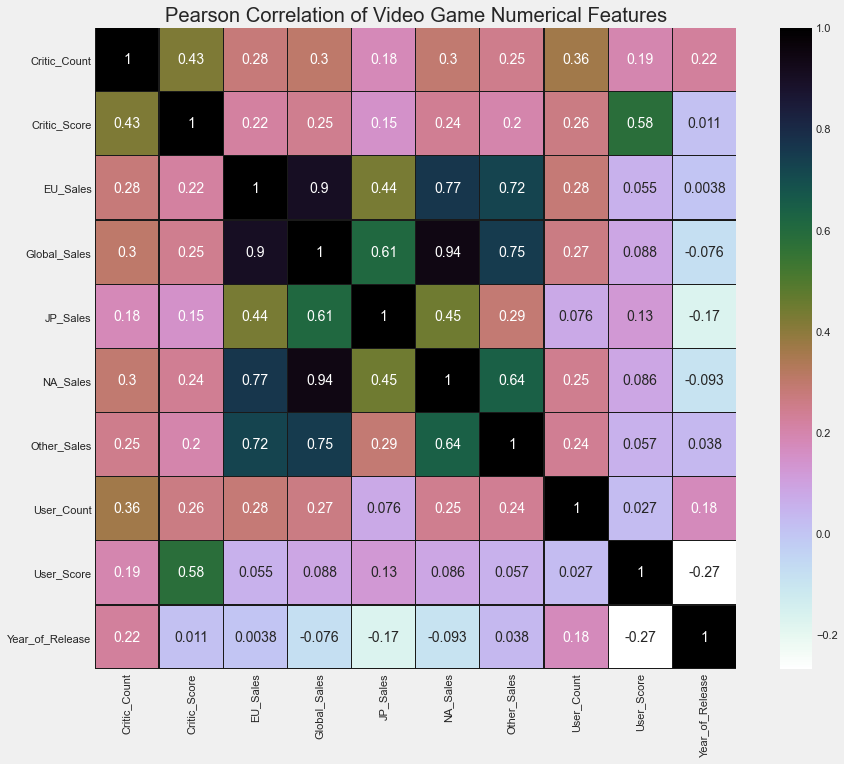

In [4]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in ds.iteritems():
    if type(colvalue[2]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = ds.columns.difference(str_list) 
# Create Dataframe containing only numerical features
ds_num = ds[num_list]
f, ax = plt.subplots(figsize=(14, 11))
plt.title('Pearson Correlation of Video Game Numerical Features')
# Draw the heatmap using seaborn
sns.heatmap(ds_num.astype(float).corr(),linewidths=0.25,vmax=1.0, 
            square=True, cmap="cubehelix_r", linecolor='k', annot=True)

In [5]:
def rm_outliers(df, list_of_keys):
    df_out = df
    for key in list_of_keys:
        # Calculate first and third quartile
        first_quartile = df_out[key].describe()["25%"]
        third_quartile = df_out[key].describe()["75%"]

        # Interquartile range
        iqr = third_quartile - first_quartile

        # Remove outliers
        removed = df_out[(df_out[key] <= (first_quartile - 3 * iqr)) |
                    (df_out[key] >= (third_quartile + 3 * iqr))] 
        df_out = df_out[(df_out[key] > (first_quartile - 3 * iqr)) &
                    (df_out[key] < (third_quartile + 3 * iqr))]
    return df_out, removed


In [6]:
ds, rmvd_global = rm_outliers(ds, ["Global_Sales"])

In [7]:
ds, rmvd_critic = rm_outliers(ds, ["Critic_Score"])

In [8]:
ds, rmvd_User = rm_outliers(ds, ["User_Score"])

In [9]:
data_na = (ds.isnull().sum() / len(ds)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio
Year_of_Release,1.837478
Rating,1.092983
Developer,0.063361
Publisher,0.063361


In [10]:
print(pd.value_counts(ds["Platform"]))

PS2     1014
X360     759
PC       681
PS3      681
XB       565
Wii      428
DS       420
PSP      374
GC       342
GBA      224
PS4      198
3DS      145
XOne     143
PS       125
PSV      119
WiiU      81
DC        14
Name: Platform, dtype: int64


In [11]:
ds = ds[(ds['Platform'] == 'PS3') | (ds['Platform'] == 'PS4') | (ds['Platform'] == 'X360') | (ds['Platform'] == 'XOne') | (ds['Platform'] == 'Wii') | (ds['Platform'] == 'WiiU') | (ds['Platform'] == 'PC')]
print(pd.value_counts(ds["Platform"]))

#Let's see the shape of the data again
print(ds.shape)

#Lets see the missing ratios again
data_na = (ds.isnull().sum() / len(ds)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

X360    759
PC      681
PS3     681
Wii     428
PS4     198
XOne    143
WiiU     81
Name: Platform, dtype: int64
(2971, 16)


,Missing Ratio
Rating,2.154157
Year_of_Release,1.918546
Developer,0.100976
Publisher,0.100976


In [12]:
ds = ds.dropna(subset=['Critic_Score'])

#Let's see the shape of the data again
print(ds.shape)

#Lets see the missing ratios again
data_na = (ds.isnull().sum() / len(ds)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

(2971, 16)


,Missing Ratio
Rating,2.154157
Year_of_Release,1.918546
Developer,0.100976
Publisher,0.100976


In [13]:
ds['Publisher'] = ds['Publisher'].fillna(ds['Publisher'].mode()[0])
ds['Developer'] = ds['Developer'].fillna(ds['Developer'].mode()[0])
ds['Rating'] = ds['Rating'].fillna(ds['Rating'].mode()[0])
ds['Year_of_Release'] = ds['Year_of_Release'].fillna(ds['Year_of_Release'].median())
#There's "tbd" values in the mix here which we need to handle first
ds['User_Score'] = ds['User_Score'].replace('tbd', None)

#Now we can handle the N/A's appropriately
ds['User_Score'] = ds['User_Score'].fillna(ds['User_Score'].median())

ds['User_Count'] = ds['User_Count'].fillna(ds['User_Count'].median())



In [14]:
data_na = (ds.isnull().sum() / len(ds)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


ds['Platform'] = le.fit_transform(ds['Platform'])
ds['Genre'] = le.fit_transform(ds['Genre'])
ds['Rating'] = le.fit_transform(ds['Rating'])

In [16]:

ds = ds.drop(['Name', 'Year_of_Release', 'Publisher', 'Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)

In [17]:
ds.head()

,Platform,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
1060,1,8,1.69,94.0,27.0,8.5,1863.0,2
1071,5,6,1.68,64.0,62.0,5.9,104.0,4
1074,3,4,1.68,78.0,58.0,8.5,301.0,0
1075,1,0,1.68,82.0,50.0,7.9,135.0,2
1078,0,11,1.68,90.0,70.0,7.9,2280.0,1


In [18]:
X = ds[['Critic_Score', 'User_Score', 'Global_Sales']].values
Y = ds['Genre'].values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
  
X = sc.transform(X) 

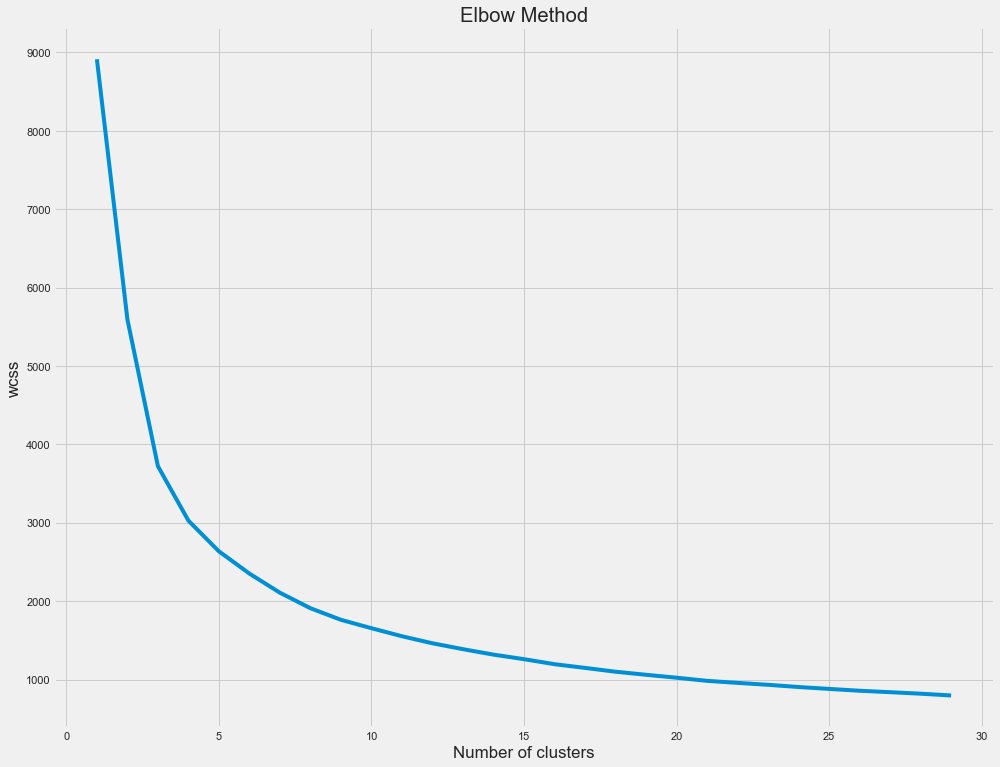

In [19]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,30):
    k_means=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
plt.plot(range(1,30),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [20]:

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


for n_cluster in range(2, 30):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.35274744947690695
For n_clusters=3, The Silhouette Coefficient is 0.3715403891429257
For n_clusters=4, The Silhouette Coefficient is 0.31645031622966946
For n_clusters=5, The Silhouette Coefficient is 0.3256845629213812
For n_clusters=6, The Silhouette Coefficient is 0.2911976307441708
For n_clusters=7, The Silhouette Coefficient is 0.2716423090110254
For n_clusters=8, The Silhouette Coefficient is 0.277672364584203
For n_clusters=9, The Silhouette Coefficient is 0.2784952316685018
For n_clusters=10, The Silhouette Coefficient is 0.27936746696310233
For n_clusters=11, The Silhouette Coefficient is 0.2597779440879771
For n_clusters=12, The Silhouette Coefficient is 0.2640823452246384
For n_clusters=13, The Silhouette Coefficient is 0.2592654299646546
For n_clusters=14, The Silhouette Coefficient is 0.2632249939462652
For n_clusters=15, The Silhouette Coefficient is 0.2561987294607991
For n_clusters=16, The Silhouette Coefficient is 0.257

In [21]:
##Fitting kmeans to the dataset
km1=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km1.fit_predict(X)

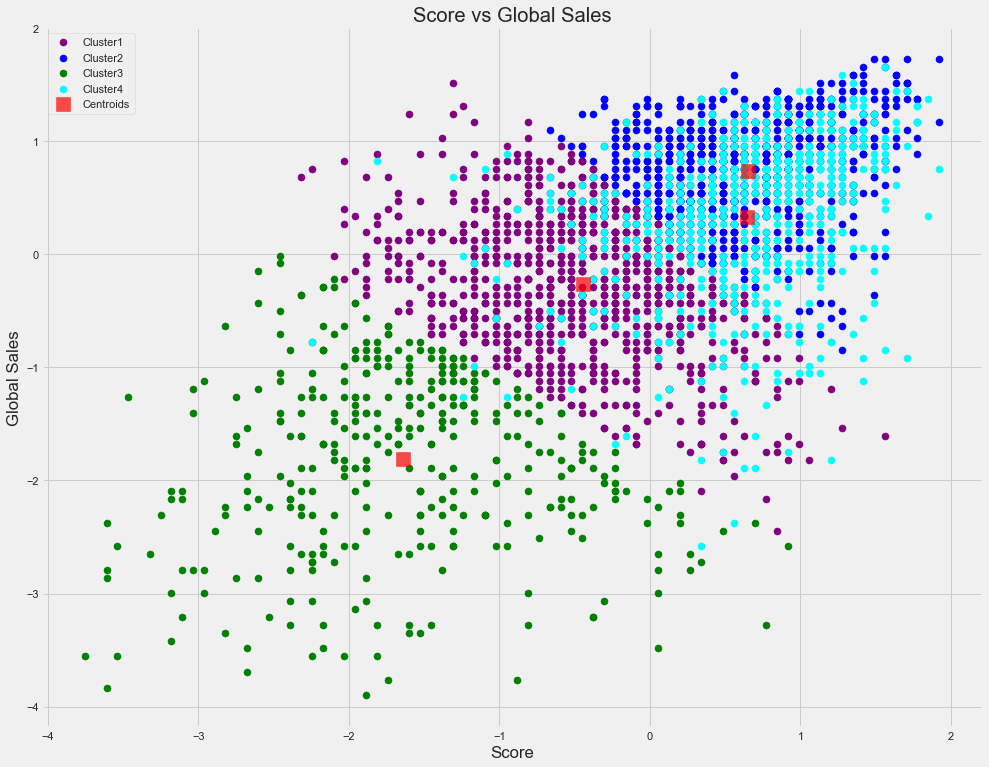

In [22]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')

plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Score vs Global Sales')
plt.xlabel('Score')
plt.ylabel('Global Sales')
plt.legend()
plt.show()